<a href="https://colab.research.google.com/github/blackxhrt2102/hand/blob/main/recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing modules:-**

In [295]:
import numpy as np
import pandas as pd
import zipfile

import matplotlib.pyplot as plt
import seaborn as sns

**Unzipping file and loading the dataset:-**

In [296]:
data=zipfile.ZipFile('/content/BX-CSV-Dump.zip')
data.extractall('/content/')

**Loading the books dataset:-**

In [297]:
books=pd.read_csv('/content/BX-Books.csv',sep=';',error_bad_lines=False,encoding='latin1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 

**First few rows of books dataset:-**

In [298]:
print('First few rows of dataset:-')
books.head(4)

First few rows of dataset:-


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...


**Shape of the dataset:-**

In [299]:
print('Shape of book dataset:-',end=' ')
books.shape

Shape of book dataset:- 

(271360, 8)

* There are about 271360 books to recommend.

**Statistical description of dataset:-**

In [300]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


* Columns in books dataset:-

In [301]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

**Preprocessing the book dataset:-**

* Removing unnecessary columns:-

In [302]:
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

* Dropping duplicate rows specially books and ISBN.

In [303]:
books.drop_duplicates(['ISBN','Book-Title'],inplace=True)

**Loading user and rating csv file:-**

* Rating csv file

In [304]:
ratings=pd.read_csv('/content/BX-Book-Ratings.csv',sep=';',error_bad_lines=False,encoding='latin1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


* Shape of the rating dataset:-

In [305]:
print('Shape of the rating',end=' ')
ratings.shape

Shape of the rating 

(1149780, 3)

In [306]:
ratings.head(4)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3


**Loading user dataset:-**

In [307]:
users=pd.read_csv('/content/BX-Users.csv',sep=';',error_bad_lines=False,encoding='latin1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [308]:
print('Shape of the user dataset:-')
users.shape

Shape of the user dataset:-


(278858, 3)

In [309]:
users.head(4)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0


# Exploratory Data Analysis

**Top users that review the most book:-**

In [310]:
rating=ratings['User-ID'].value_counts(ascending=False)[:20].reset_index().rename(columns={'index':'user-id','User-ID':'total_no_of_review'})

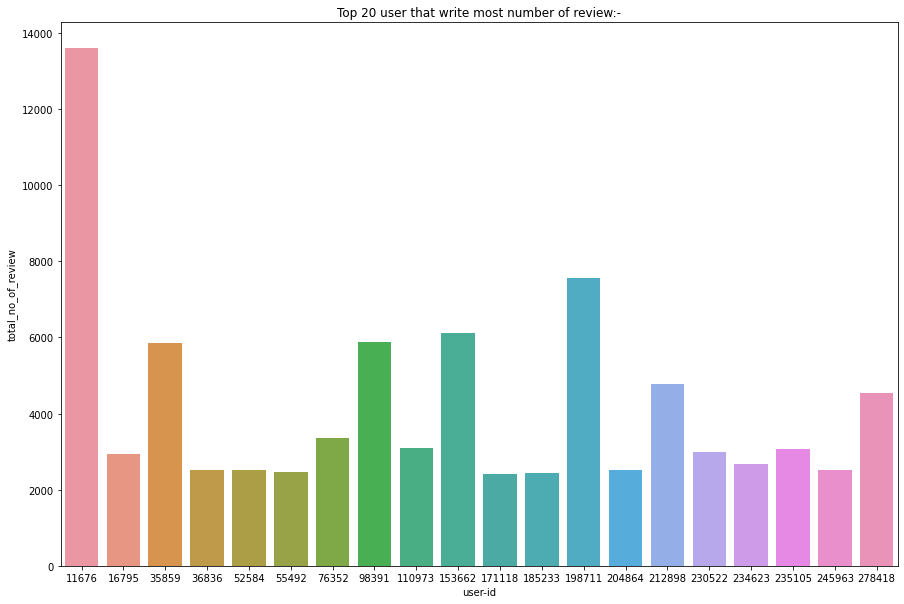

In [311]:
plt.figure(figsize=(15,10))
sns.barplot(x=rating['user-id'],y=rating['total_no_of_review'])
plt.title('Top 20 user that write most number of review:-')
plt.show()

**Books with most number of review:-**

In [312]:
book_rat=ratings.merge(books,on='ISBN')


In [313]:
famous_book=book_rat.groupby(['Book-Title'])['Book-Rating'].count().reset_index().sort_values('Book-Rating',ascending=False)[:20]

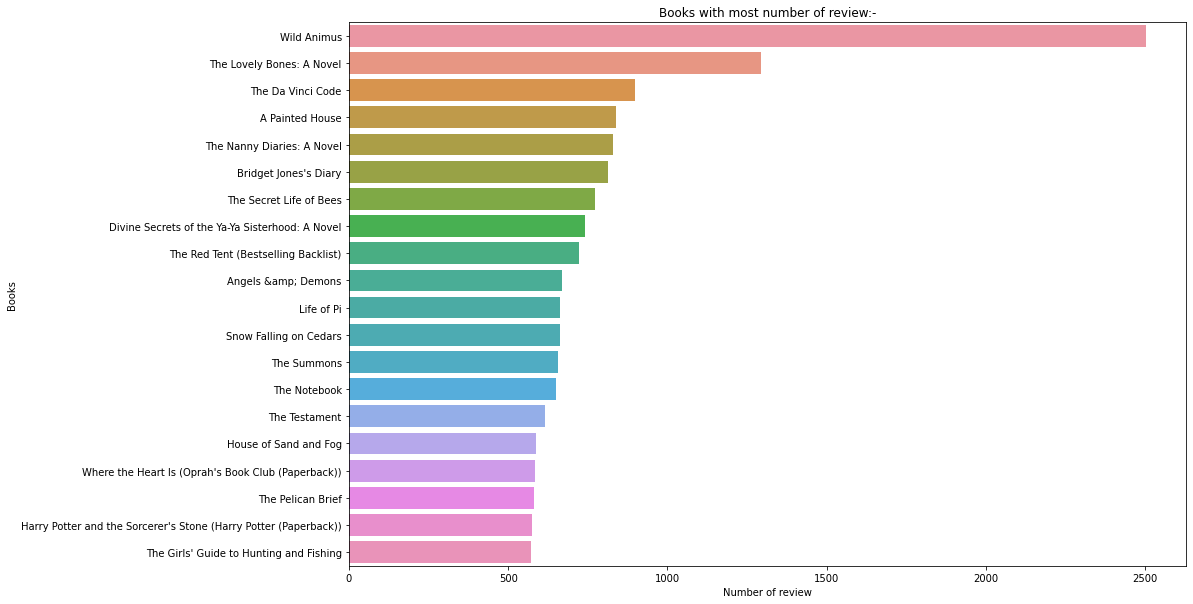

In [314]:
plt.figure(figsize=(15,10))
sns.barplot(y=list(famous_book['Book-Title']),x=list(famous_book['Book-Rating']))
plt.title('Books with most number of review:-')
plt.ylabel('Books')
plt.xlabel('Number of review')
plt.show()

**Most famous writer on basis of review**

In [315]:
famous_writer=book_rat.groupby('Book-Author')['Book-Rating'].count().reset_index().sort_values('Book-Rating',ascending=False)[:15]
famous_writer

,Book-Author,Book-Rating
90803,Stephen King,10053
73022,Nora Roberts,8429
48763,John Grisham,6010
42799,James Patterson,5845
66135,Mary Higgins Clark,4777
21432,Dean R. Koontz,4313
95761,Tom Clancy,4036
19266,Danielle Steel,3726
91816,Sue Grafton,3457
43814,Janet Evanovich,3350


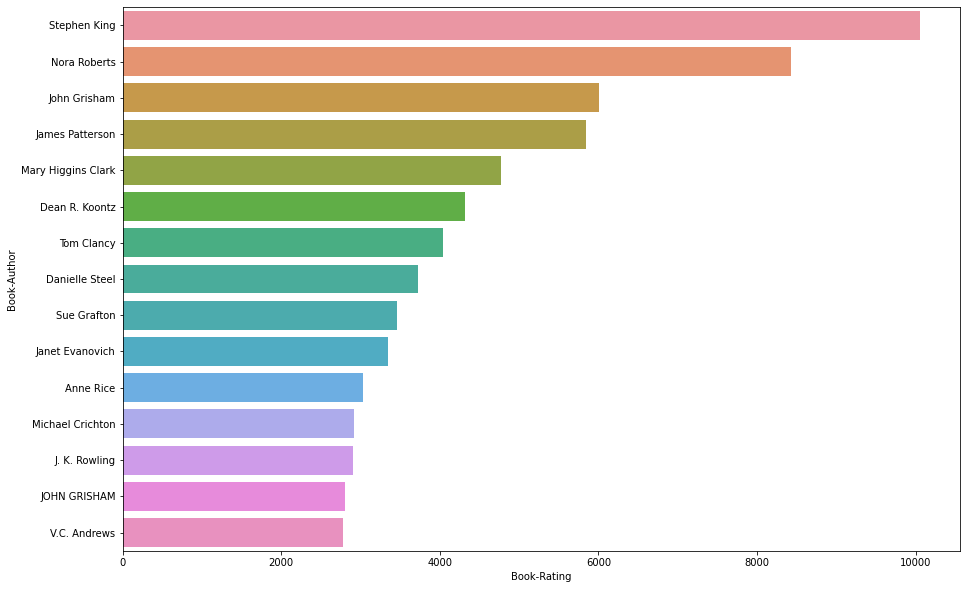

In [316]:
plt.figure(figsize=(15,10))
sns.barplot(y='Book-Author',x='Book-Rating',data=famous_writer)
plt.show()

# Data Cleaning

**We will only include user that has review more than 300**

In [317]:
y=ratings['User-ID'].value_counts()>200
user=y[y].index
ratings=ratings[ratings['User-ID'].isin(user)]

* Earlier we have more than 11 lak review but it has being reduced to 6.5 lakh in total.

In [318]:
book_rating=ratings.merge(books,on='ISBN')


**Taking books with more than 50 review:-**

In [319]:
rating=book_rating.groupby('Book-Title')['Book-Rating'].count().reset_index()
rating=rating.rename(columns={'Book-Rating':'Total_Rating'})                                                                      

In [320]:
final_data=book_rating.merge(rating,on='Book-Title')
final_rating=final_data[final_data['Total_Rating']>=50]

In [321]:
final_rating.drop_duplicates(['User-ID','Book-Title'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [322]:
pivot_table=final_rating.pivot_table(values='Book-Rating',index='Book-Title',columns='User-ID')

In [323]:
pivot_table.fillna(0,inplace=True)

In [324]:
from scipy.sparse import csr_matrix

final=csr_matrix(pivot_table)

In [325]:
from sklearn.neighbors import NearestNeighbors
model=NearestNeighbors(algorithm='brute')
model.fit(final)

NearestNeighbors(algorithm='brute')

In [326]:
distances,suggestion=model.kneighbors(pivot_table.iloc[238,:].values.reshape(1,-1),n_neighbors=6)

In [327]:
for i in range(len(suggestion)):
  print(pivot_table.index[suggestion[i]])

Index(['Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Order of the Phoenix (Book 5)',
       'The Cradle Will Fall', 'Exclusive', 'Tough Cookie'],
      dtype='object', name='Book-Title')


In [338]:
np.where(pivot_table.index=='Harry Potter and the Prisoner of Azkaban (Book 3)')[0][0]

240

In [339]:
def recommend(book):
  index=np.where(pivot_table.index==book)[0][0]
  distances,suggestion=model.kneighbors(pivot_table.iloc[index,:].values.reshape(1,-1),n_neighbors=6)
  for i in range(len(suggestion)):
    print(pivot_table.index[suggestion[i]])



In [340]:
recommend('Harry Potter and the Goblet of Fire (Book 4)')

Index(['Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Order of the Phoenix (Book 5)',
       'The Cradle Will Fall', 'Exclusive', 'Tough Cookie'],
      dtype='object', name='Book-Title')


In [344]:
import pickle
pickle.dump(pivot_table,open('book_tag.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))

In [347]:

import pickle

import requests

book_matrix = pickle.load(open('/content/book_tag.pkl','rb'))
model = pickle.load(open('/content/model.pkl','rb'))

In [348]:
book_matrix

User-ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
